In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [255]:
# Load data
df = pd.read_csv("OnlineRetail.csv", encoding="latin1")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### EDA

In [256]:
# Pastikan InvoiceDate dalam datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")

# Ambil jam transaksi
df["Hour"] = df["InvoiceDate"].dt.hour

# 1. Produk paling sering dibeli
top_products = df["StockCode"].value_counts().head(20)

# 2. Customer paling sering transaksi
top_customers = df["CustomerID"].value_counts().head(20)

# 3. Jam transaksi paling ramai
hourly = df["Hour"].value_counts().sort_index()

# 4. Sebaran harga
unit_price = df[df["UnitPrice"] > 0]["UnitPrice"]
unit_price = unit_price[unit_price < 10]

# 5. Negara dengan transaksi terbanyak
country_counts = df["Country"].value_counts()

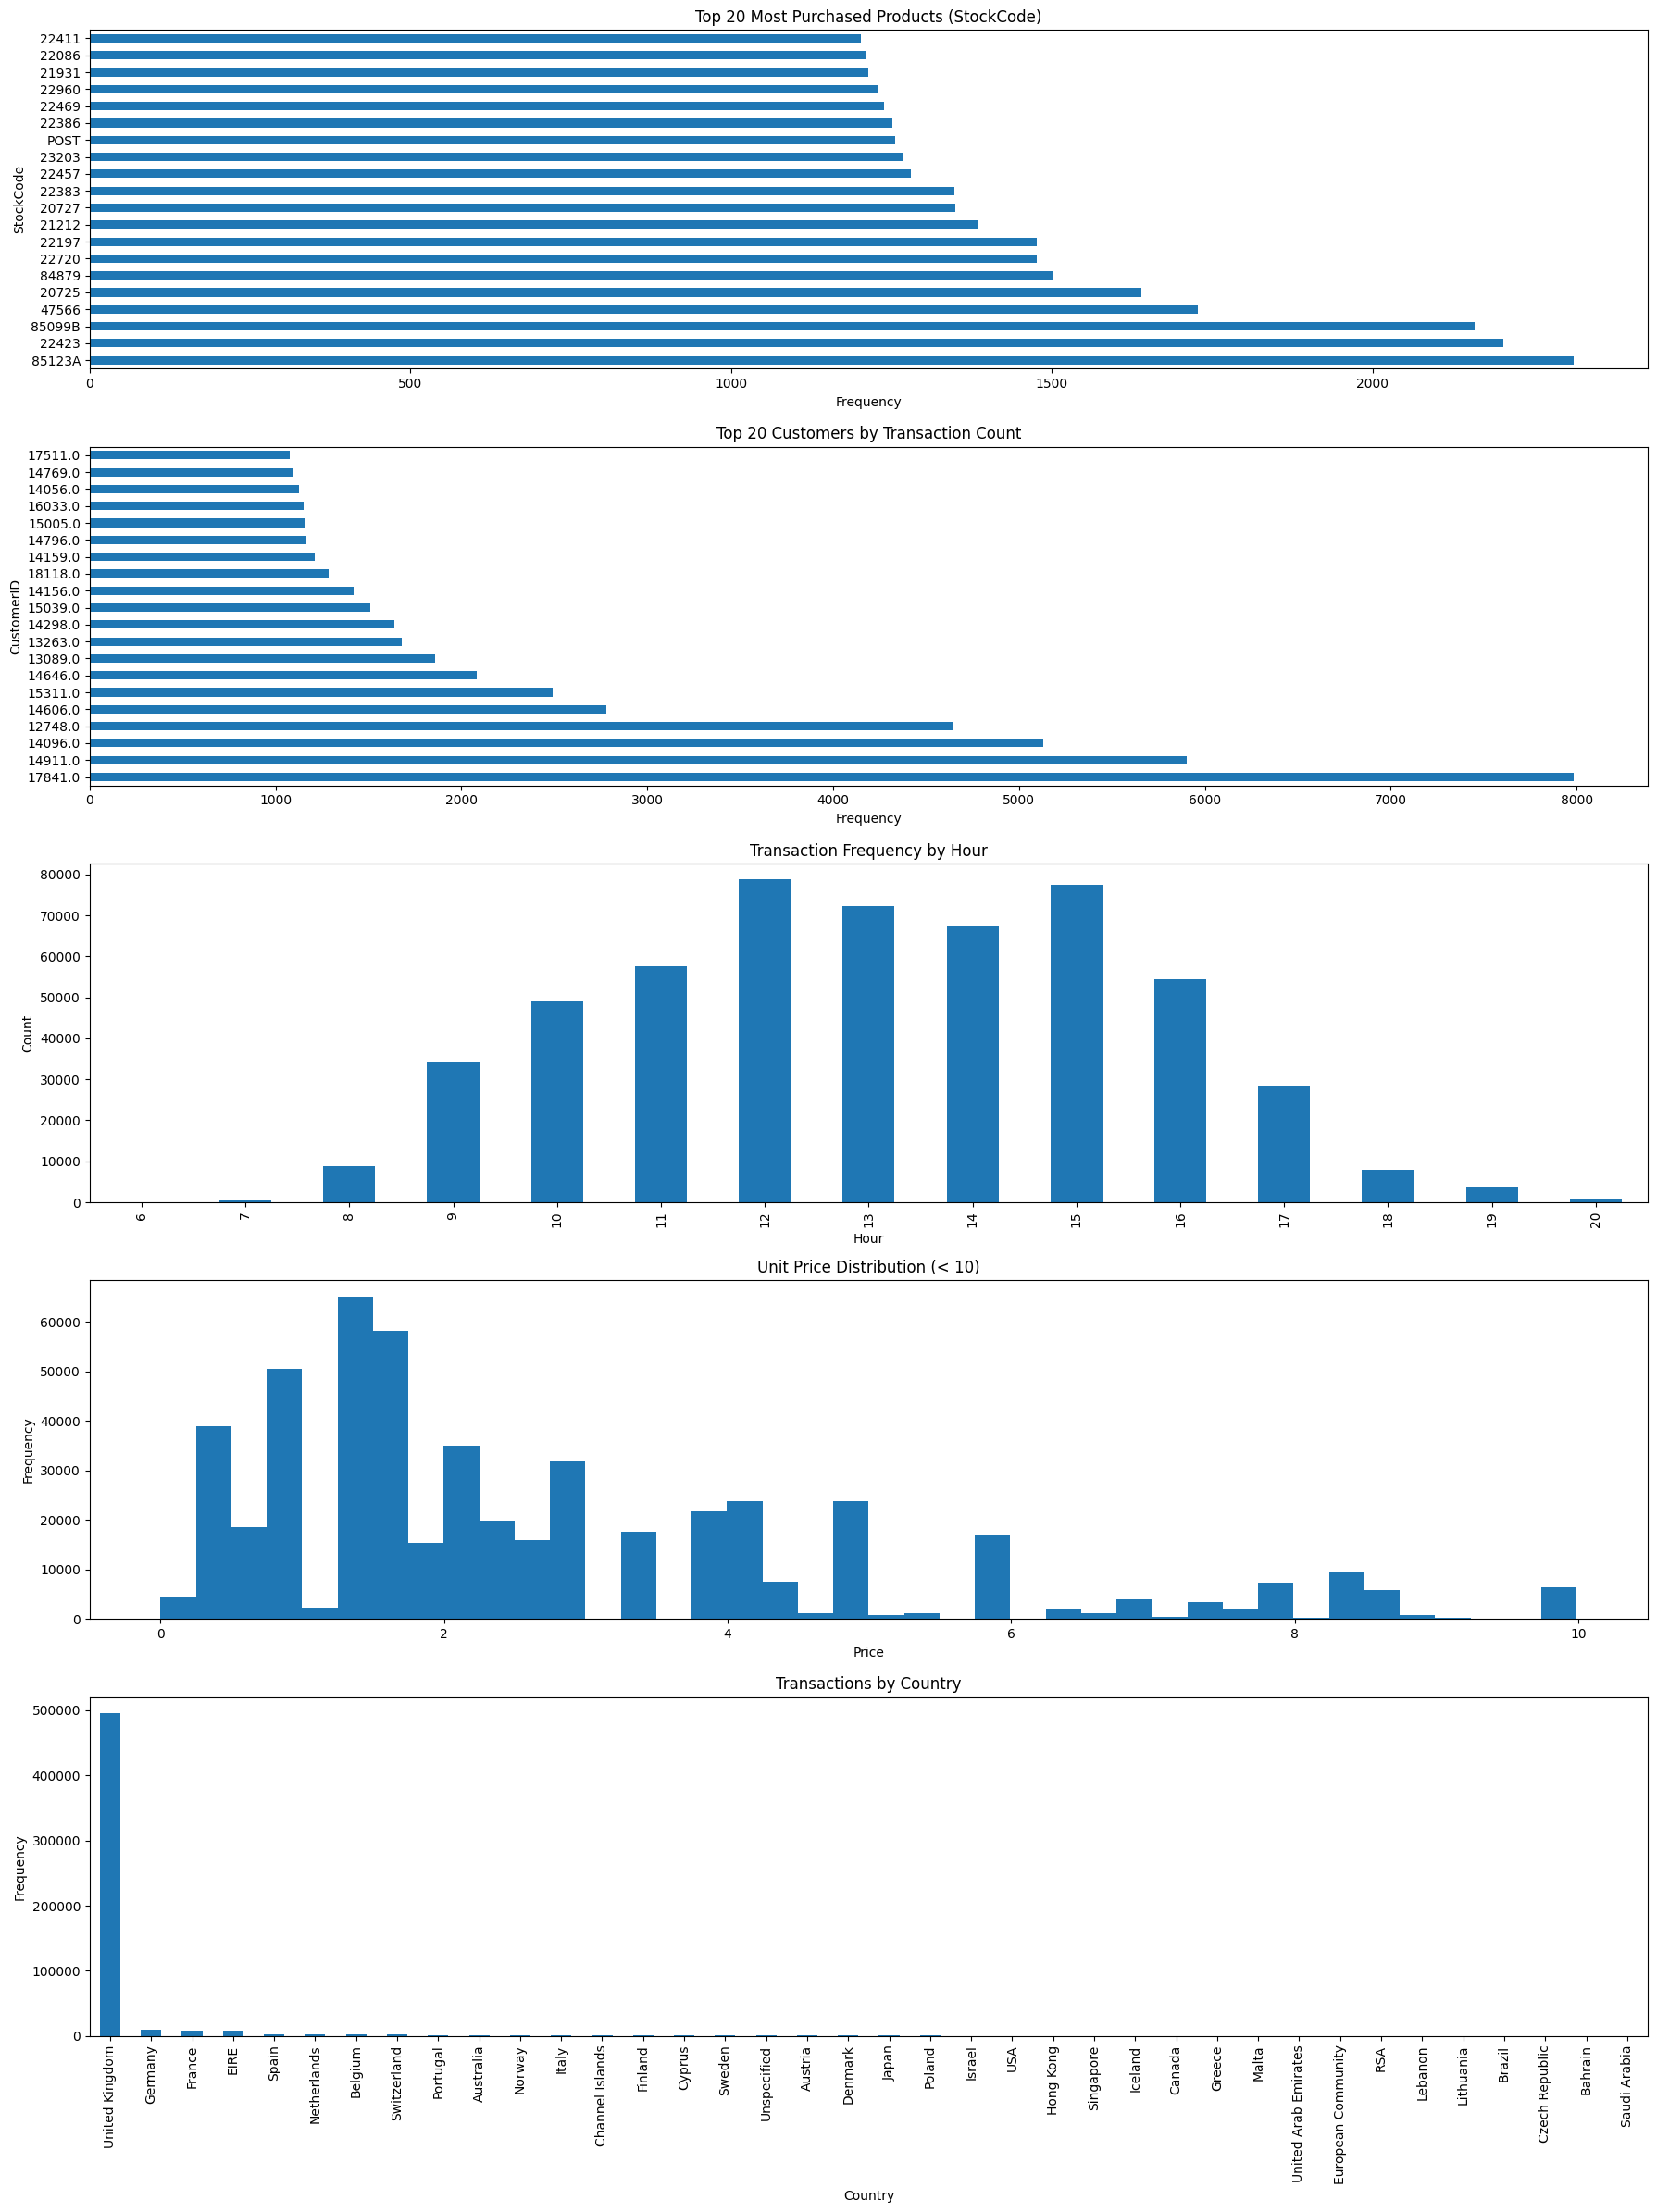

In [257]:

# Plot
plt.figure(figsize=(18, 24))

# Produk
plt.subplot(5, 1, 1)
top_products.plot(kind="barh")
plt.title("Top 20 Most Purchased Products (StockCode)")
plt.xlabel("Frequency")

# Customer
plt.subplot(5, 1, 2)
top_customers.plot(kind="barh")
plt.title("Top 20 Customers by Transaction Count")
plt.xlabel("Frequency")

# Jam transaksi
plt.subplot(5, 1, 3)
hourly.plot(kind="bar")
plt.title("Transaction Frequency by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")

# Sebaran harga
plt.subplot(5, 1, 4)
plt.hist(unit_price, bins=40)
plt.title("Unit Price Distribution (< 10)")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Negara
plt.subplot(5, 1, 5)
country_counts.plot(kind="bar")
plt.title("Transactions by Country")
plt.xlabel("Country")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [258]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Hour         541909 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 35.1+ MB


In [259]:
# Cek jumlah missing
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Hour                0
dtype: int64

In [260]:
# persentase  missing
missing_percent = (df.isnull().sum() / len(df) * 100).round(2)
print(missing_percent)


InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
Hour            0.00
dtype: float64


hapus saja customerid yang missing, untuk description biarkan saja

In [261]:
# Hapus baris tanpa CustomerID
df = df.dropna(subset=['CustomerID'])
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Hour           0
dtype: int64

In [262]:
# Cek duplikasi
df.duplicated().sum()

np.int64(5225)

In [263]:
# Hapus duplikasi
df = df.drop_duplicates()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   Hour         401604 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 29.1+ MB


In [264]:
# Hapus transaksi dengan Quantity ≤ 0 atau UnitPrice ≤ 0 (hanya ambil yg > 0)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   Hour         392692 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.5+ MB


setelah preprocessing, rows turun dari 500.000 an jadi 390.000 an. Masih aman

In [265]:
# Buat kolom TotalPrice untuk Monetary
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,20.34


In [266]:
# Tentukan snapshot date 1 hari setelah transaksi terakhir
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Hitung RFM
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

rfm.rename(columns={'InvoiceDate':'Recency',
                    'InvoiceNo':'Frequency',
                    'TotalPrice':'Monetary'}, inplace=True)

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


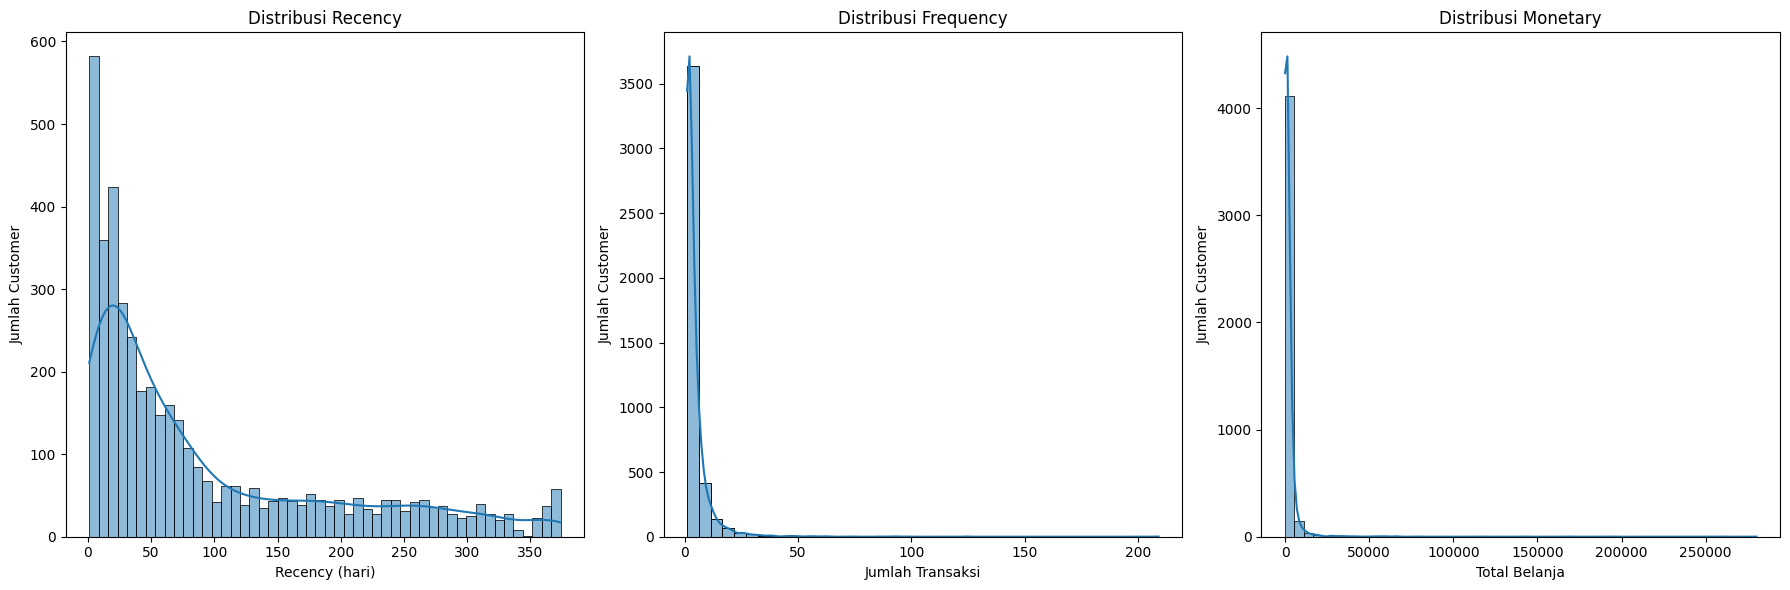

In [267]:
plt.figure(figsize=(18,6))

# Recency
plt.subplot(1,3,1)
sns.histplot(rfm['Recency'], bins = 50, kde=True)
plt.title("Distribusi Recency")
plt.xlabel("Recency (hari)")
plt.ylabel("Jumlah Customer")

# Frequency
plt.subplot(1,3,2)
sns.histplot(rfm['Frequency'], bins=40, kde=True)
plt.title("Distribusi Frequency")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Jumlah Customer")

# Monetary
plt.subplot(1,3,3)
sns.histplot(rfm['Monetary'], bins = 50, kde=True)
plt.title("Distribusi Monetary")
plt.xlabel("Total Belanja")
plt.ylabel("Jumlah Customer")

plt.tight_layout()
plt.show()

#### Insight yang didapat : 
1. Distribusi Recency (Keterkinian)
Plot: Distribusi menurun tajam di awal(right-skewed).

Insight:
- Basis Pelanggan Aktif Tinggi: Sebagian besar pelanggan memiliki nilai Recency yang sangat rendah (sekitar 0 hingga 50 hari). Ini berarti sebagian besar transaksi terjadi baru-baru ini, menunjukkan basis pelanggan yang cukup aktif dan terlibat dalam periode waktu yang dekat.

- Potensi Churn/Pelanggan Lama: Terdapat sejumlah kecil pelanggan dengan Recency tinggi (mendekati 350 hari). Pelanggan ini sudah lama tidak bertransaksi dan mungkin berisiko churn (berhenti membeli).

2. Distribusi Frequency (Frekuensi)
Plot: Distribusi sangat miring ke kanan (heavily right-skewed) dengan puncak yang sangat tinggi di sekitar nol.

Insight:

- Pelanggan Sekali Beli Dominan: Mayoritas pelanggan (sekitar 3500+ pelanggan) hanya melakukan 1 hingga 2 transaksi saja. Ini menunjukkan bahwa bisnis ini memiliki banyak pelanggan yang hanya mencoba atau membeli sekali, tetapi sulit untuk mempertahankan mereka agar membeli lagi (repeat purchase).

- Pelanggan Loyal Kecil: Hanya segelintir pelanggan yang memiliki Frequency sangat tinggi (misalnya di atas 50 transaksi). Kelompok ini adalah pelanggan loyal yang sangat berharga dan harus dipertahankan.

3. Distribusi Monetary (Moneter)
Plot: Distribusi juga sangat miring ke kanan, dengan puncak yang sangat tinggi mendekati nol.

Insight:

- Nilai Belanja Kecil Dominan: Mayoritas pelanggan memiliki Total Belanja yang relatif kecil (berada di titik awal sumbu x). Hal ini sesuai dengan temuan Frequency, di mana banyak pelanggan hanya membeli sekali dengan jumlah kecil.

- Pelanggan Bernilai Tinggi: Meskipun jumlahnya sedikit, terdapat beberapa pelanggan yang memiliki nilai Monetary sangat tinggi (hingga lebih dari Rp 2.500.000). Kelompok ini dikenal sebagai High-Value Customers atau Whales yang menyumbang persentase signifikan dari total pendapatan.

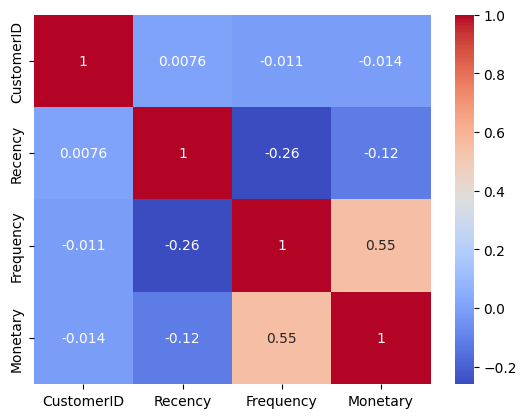

In [268]:
sns.heatmap(rfm.corr(), annot=True, cmap="coolwarm")
plt.show()

1. Korelasi Positif Kuat:
    - Frequency dan Monetary (0.55):

        Insight: Terdapat korelasi positif yang cukup kuat. Artinya, pelanggan yang lebih sering berbelanja (Frequency tinggi) cenderung memiliki total pengeluaran -yang lebih besar (Monetary tinggi).

        Implikasi: Frequency adalah prediktor yang baik untuk Monetary. Strategi untuk meningkatkan frekuensi pembelian akan secara langsung berkontribusi pada peningkatan pendapatan.

2. Korelasi Negatif Sedang:
    - Recency dan Frequency (-0.26):

        Insight: Terdapat korelasi negatif yang sedang. Artinya, semakin baru pelanggan bertransaksi (Recency rendah), semakin sering mereka cenderung berbelanja (Frequency tinggi).

        Implikasi: Pelanggan yang aktif saat ini (Recency rendah) adalah juga pelanggan yang sering membeli. Penting untuk menjaga pelanggan aktif ini agar tidak menjadi "lama" (Recency tinggi).

    - Recency dan Monetary (-0.12):

        Insight: Terdapat korelasi negatif yang lemah. Artinya, pelanggan yang lebih baru bertransaksi (Recency rendah) cenderung memiliki Monetary yang sedikit lebih tinggi, namun hubungannya tidak sekuat dengan Frequency.

3. Korelasi yang Tidak Signifikan (Mendekati Nol):
    - CustomerID dengan semua variabel (0.0076, -0.011, -0.014):

        Insight: Korelasi CustomerID dengan semua variabel RFM sangat mendekati nol. Ini adalah hal yang diharapkan, karena CustomerID hanyalah pengenal unik dan tidak memiliki hubungan linier dengan perilaku pembelian.

        

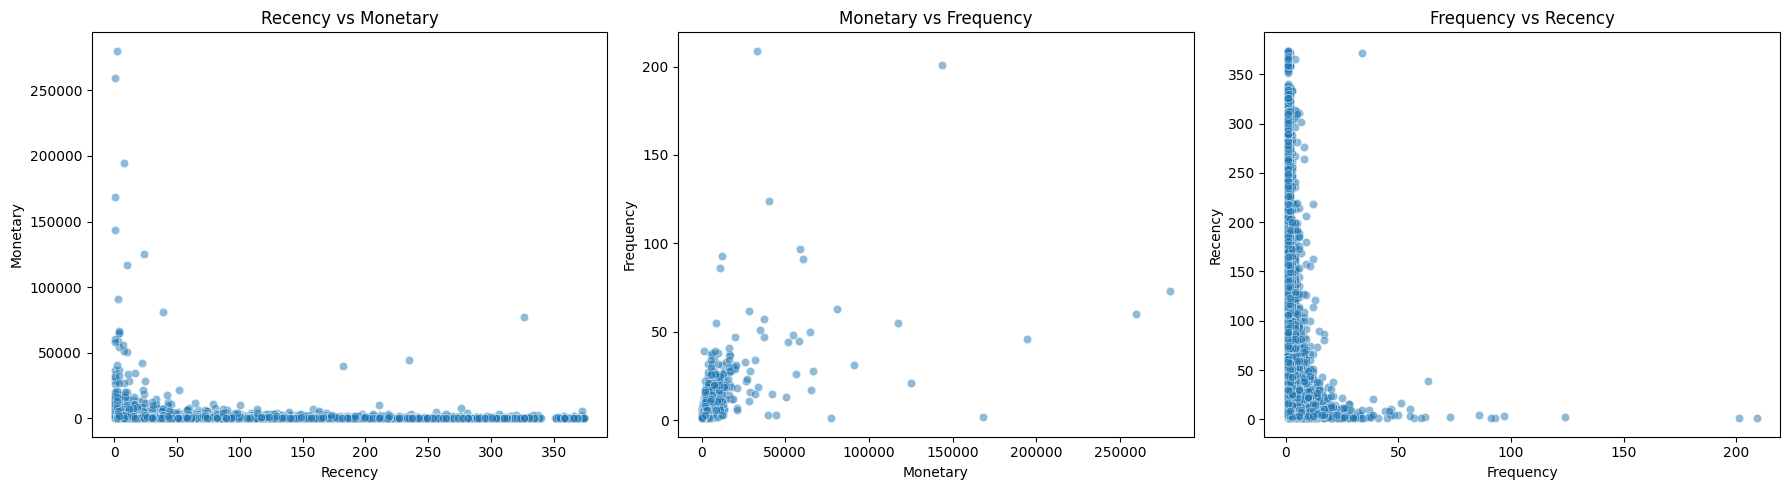

In [271]:
plt.figure(figsize=(18,5))

# 1. Recency vs Monetary
plt.subplot(1,3,1)
sns.scatterplot(data=rfm, x='Recency', y='Monetary', alpha=0.5)
plt.title("Recency vs Monetary")

# 2. Monetary vs Frequency
plt.subplot(1,3,2)
sns.scatterplot(data=rfm, x='Monetary', y='Frequency', alpha=0.5)
plt.title("Monetary vs Frequency")

# 3. Frequency vs Recency
plt.subplot(1,3,3)
sns.scatterplot(data=rfm, x='Frequency', y='Recency', alpha=0.5)
plt.title("Frequency vs Recency")

plt.tight_layout() 
plt.show()

1. Recency vs Monetary (Recency di Sumbu X, Monetary di Sumbu Y)
    Pola Umum: Sebagian besar titik data berkumpul di area Recency rendah (dekat 0 hari) dan Monetary rendah (dekat 0).

    Hubungan: Secara umum, ketika Recency meningkat (semakin lama pelanggan tidak membeli), Monetary cenderung turun, atau setidaknya tidak ada peningkatan Monetary yang jelas. Ini sesuai dengan korelasi negatif yang lemah (-0.12).

    Insight Penting (Outliers): Ada beberapa outlier di area Recency rendah (baru beli) yang memiliki Monetary sangat tinggi (di atas 100.000, bahkan hingga 250.000). Ini adalah Pelanggan Terbaik (Best Customers). Ada juga beberapa outlier dengan Recency sangat tinggi (sudah lama tidak beli, >300 hari) tetapi Monetary mereka tetap rendah.

2. Monetary vs Frequency (Monetary di Sumbu X, Frequency di Sumbu Y)
    Pola Umum: Sebagian besar titik data berkumpul di area Monetary dan Frequency yang rendah.

    Hubungan: Ada kecenderungan yang jelas, yaitu semakin tinggi Monetary (pengeluaran total), semakin tinggi pula Frequency (frekuensi pembelian). Pola ini mendukung korelasi positif yang kuat (0.55).

    Insight Penting (Outliers):Terdapat beberapa Pelanggan Berharga Tinggi yang:
    - Memiliki Monetary sangat tinggi (hingga 250.000) meskipun Frequency-nya moderat (di bawah 50 kali). Ini mungkin pelanggan yang melakukan pembelian besar, tetapi jarang.

    - Memiliki Frequency sangat tinggi (hingga 200 kali) meskipun Monetary-nya relatif moderat. Ini mungkin pelanggan yang melakukan pembelian kecil, tetapi sangat sering.

3. Frequency vs Recency (Frequency di Sumbu X, Recency di Sumbu Y)
    Pola Umum: Titik data sangat terkonsentrasi di sudut kiri bawah (Frequency rendah dan Recency rendah). Ini menunjukkan bahwa banyak pelanggan baru saja membeli, tetapi hanya sekali atau dua kali.

    Hubungan: Grafik menunjukkan hubungan non-linier yang kuat: Ketika Frequency meningkat, Recency cenderung menurun dengan cepat. Artinya, pelanggan yang sering membeli adalah pelanggan yang baru-baru ini membeli. Pola ini mendukung korelasi negatif sedang (-0.26).

    Insight Penting: Garis kepadatan data yang curam ini menunjukkan bahwa keterkinian pembelian (Recency) sangat bergantung pada seberapa sering pelanggan membeli (Frequency). Jika Anda berhenti membeli, Anda dengan cepat menjadi pelanggan "lama" (Recency tinggi).